In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as sp

import matrices.loading as mload

In [2]:
plt.rcParams["figure.figsize"] = (10,10)
mpl.rcParams['image.cmap'] = 'jet'

In [3]:
data_path = "resources/aminer/v1" # 629814 documents

Load sparse matrix with jaccard similarities.

In [4]:
matrix_jaccard = mload.load_matrix_jaccard_sim(data_path) # 998 documents sample
print(matrix_jaccard.ndim, matrix_jaccard.shape)

Loading saved matrix ...
2 (998, 998)


Load sparse matrix with word2vec similarities.

In [5]:
matrix_word2vec = mload.load_matrix_word2vec_sim(data_path) # 998 documents sample
print(matrix_word2vec.ndim, matrix_word2vec.shape)

Loading saved matrix ...
2 (998, 998)


In [6]:
N = matrix_jaccard.shape[0]
print("Number of documents", N, (matrix_jaccard.shape))

# Dice
matrix_dice = np.divide(np.multiply(matrix_jaccard,2), np.add(matrix_jaccard, 1))
print(matrix_dice.shape)

# Jaccard disimilarity
matrix_jaccard_dis = np.subtract(1, matrix_jaccard)
print(matrix_jaccard_dis.shape)

Number of documents 998 (998, 998)
(998, 998)
(998, 998)


In [7]:
# Means of jaccard similarities
jaccard_similarity_mean = np.divide(np.sum(matrix_jaccard, axis=1), N)
# Array of indices to sort matrices  
jaccard_ordered_indices = jaccard_similarity_mean.argsort()[::-1]

# Means of jaccard similarities
jaccard_disimilarity_mean = np.divide(np.sum(matrix_jaccard_dis, axis=1), N)
# Array of indices to sort matrices  
jaccard_dis_ordered_indices = jaccard_disimilarity_mean.argsort()[::-1]

# Means of word2vec similarities
word2vec_similarity_mean = np.divide(np.sum(matrix_word2vec, axis=1), N)
# Array of indices to sort matrices  
word2vec_ordered_indices = word2vec_similarity_mean.argsort()[::-1]

# Means of dice similarities
dice_similarity_mean = np.divide(np.sum(matrix_dice, axis=1), N)
# Array of indices to sort matrices  
dice_ordered_indices = dice_similarity_mean.argsort()[::-1]

# SVD

In [8]:
n_singularvalues = 998
s_ones = np.ones(998)

## word2vec

In [9]:
Uw2v, sw2v, Vw2v = np.linalg.svd(matrix_word2vec, full_matrices=False)

n_sw2v = n_singularvalues

sw2v = s_ones # diagonal 

Sw2v = np.diag(sw2v[:n_sw2v])
matrix_word2vec_ = np.dot(Uw2v[:,:n_sw2v], np.dot(Sw2v, Vw2v[:n_sw2v,:]))

## jaccard

In [10]:
Ujs, sjs, Vjs = np.linalg.svd(matrix_jaccard, full_matrices=False)

n_sjs = n_singularvalues
sjs = s_ones # diagonal 

Sjs = np.diag(sjs[:n_sjs])
matrix_jaccard_ = np.dot(Ujs[:,:n_sjs], np.dot(Sjs, Vjs[:n_sjs,:]))

jaccard disimilarity

In [11]:
Ujd, sjd, Vjd = np.linalg.svd(matrix_jaccard_dis, full_matrices=False)

n_sjd = n_singularvalues

sjd = s_ones # diagonal 

Sjd = np.diag(sjd[:n_sjd])
matrix_jaccard_dis_ = np.dot(Ujd[:,:n_sjd], np.dot(Sjd, Vjd[:n_sjd,:]))

## dice

In [12]:
Uds, sds, Vds = np.linalg.svd(matrix_dice, full_matrices=False)

n_sds = n_singularvalues
sds = s_ones # diagonal 

Sds = np.diag(sds[:n_sds])
matrix_dice_ = np.dot(Uds[:,:n_sds], np.dot(Sds, Vds[:n_sds,:]))

## word2vec with n singular values

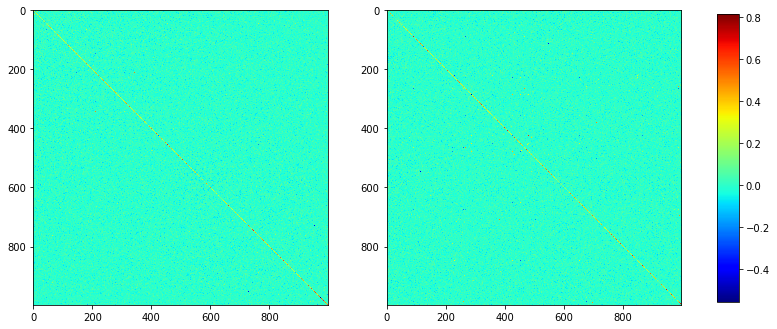

In [13]:
# singular values
# word2vec 
plt.subplot(121)
plt.imshow(matrix_word2vec_[:, word2vec_ordered_indices][word2vec_ordered_indices,:])
# word2vec with n_singularvalues singular values
plt.subplot(122)
plt.imshow(matrix_word2vec_)

plt.subplots_adjust(left=0.,  right=0.90, bottom=0.0, top=1.0)
cax = plt.axes([0.95, 0.3, 0.03, 0.4]) #[left, bottom, width, height] 
plt.colorbar(cax=cax)
plt.show()

## jaccard with n ingular values

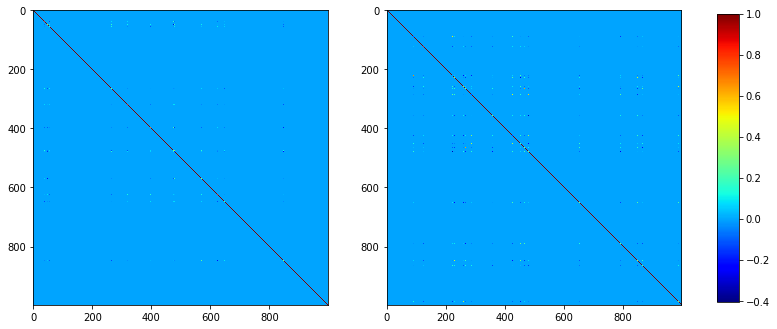

In [14]:
# singular values

# jaccard 
plt.subplot(121)
plt.imshow(matrix_jaccard_[:, jaccard_ordered_indices][jaccard_ordered_indices,:])

# jaccard with n_singularvalues singular values
plt.subplot(122)
plt.imshow(matrix_jaccard_)


plt.subplots_adjust(left=0.,  right=0.90, bottom=0.0, top=1.0)
cax = plt.axes([0.95, 0.3, 0.03, 0.4]) #[left, bottom, width, height] 
plt.colorbar(cax=cax)
plt.show()

In [15]:
# singular values

# jaccard disimilarity 
#plt.subplot(121)
#plt.imshow(matrix_jaccard_dis_[:, jaccard_dis_ordered_indices][jaccard_dis_ordered_indices,:])

# jaccard disimilarity with n_singularvalues singular values
#plt.subplot(122)
#plt.imshow(matrix_jaccard_dis_)


#plt.subplots_adjust(left=0.,  right=0.90, bottom=0.0, top=1.0)
#cax = plt.axes([0.95, 0.3, 0.03, 0.4]) #[left, bottom, width, height] 
#plt.colorbar(cax=cax)
# plt.show()

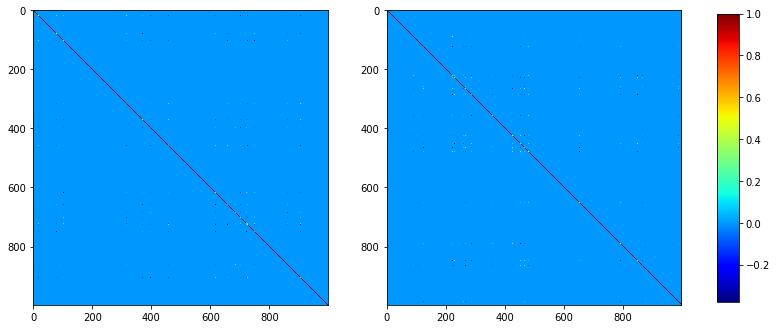

In [16]:
# singular values

# dice 
plt.subplot(121)
plt.imshow(matrix_dice_[:, dice_ordered_indices][dice_ordered_indices,:])

# dice with n_singulavalues singulavalues
plt.subplot(122)
plt.imshow(matrix_dice_)


plt.subplots_adjust(left=0.,  right=0.90, bottom=0.0, top=1.0)
cax = plt.axes([0.95, 0.3, 0.03, 0.4]) #[left, bottom, width, height] 
plt.colorbar(cax=cax)
plt.show()

## Singular values

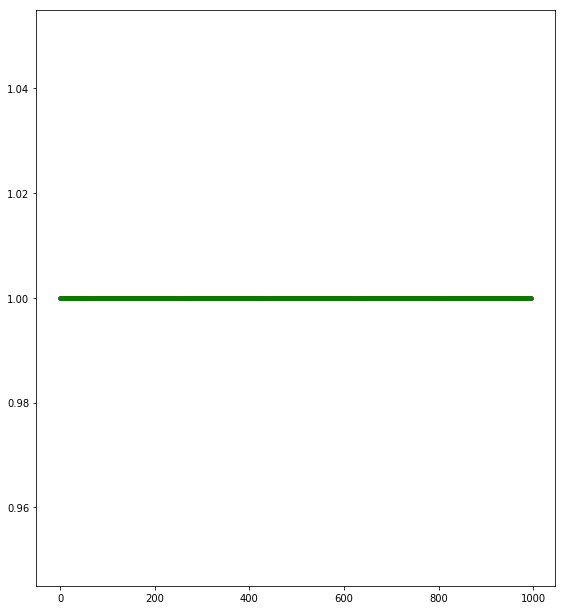

In [17]:
plt.rcParams["figure.figsize"] = (8,8)
plt.subplot(111)

# first singular value too big to plot
plt.plot(sjs[1:], 'b.')
plt.plot(sjd[1:], 'y,')
plt.plot(sw2v[1:], 'r.')
plt.plot(sds[1:], 'g.')

plt.subplots_adjust(left=0.,  right=0.90, bottom=0.0, top=1.0)
plt.show()

plt.rcParams["figure.figsize"] = (10,10)